In [1]:
img_dir = 'D:/PORTOFOLIO/STREAMLIT/Final Project Image Classification DBI/asl_alphabet_train/asl_alphabet_train'

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [3]:
data_args = dict(rescale=1./255, validation_split=.30)

In [4]:
bag_train = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

train_gen = bag_train.flow_from_directory(
img_dir,
subset="training",
shuffle=True,
target_size=(224, 224))


bag_val = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

val_gen = bag_val.flow_from_directory(
img_dir,
subset="validation",
shuffle=True,
target_size=(224, 224))

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [5]:
for image_batch, label_batch in train_gen:
  break
  image_batch.shape, label_batch.shape

In [6]:
print (train_gen.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [7]:
base_model = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
 trainable=False),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])
base_model.build([None, 224, 224, 3])
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 29)                37149     
                                                                 
Total params: 2,295,133
Trainable params: 37,149
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
base_model.compile(
 optimizer='adam',
 loss= 'categorical_crossentropy',
 metrics=['accuracy'])

In [9]:
epochs=5
history = base_model.fit(train_gen, 
                         validation_data = val_gen,
                         batch_size=32,
                         epochs = epochs)

Epoch 1/5
2175/2175 [==============================] - 2573s 1s/step - loss: 0.2926 - accuracy: 0.9311 - val_loss: 0.4767 - val_accuracy: 0.8599
Epoch 2/5
2175/2175 [==============================] - 2449s 1s/step - loss: 0.0566 - accuracy: 0.9866 - val_loss: 0.4520 - val_accuracy: 0.8661
Epoch 3/5
2175/2175 [==============================] - 6222s 3s/step - loss: 0.0368 - accuracy: 0.9904 - val_loss: 0.4295 - val_accuracy: 0.8842
Epoch 4/5
2175/2175 [==============================] - 3000s 1s/step - loss: 0.0283 - accuracy: 0.9920 - val_loss: 0.4472 - val_accuracy: 0.8790
Epoch 5/5
2175/2175 [==============================] - 2873s 1s/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.4613 - val_accuracy: 0.8778


In [11]:
base_model.save_weights('base_model_weights.h5')
base_model.save('base_model.h5')

In [13]:
import pandas as pd

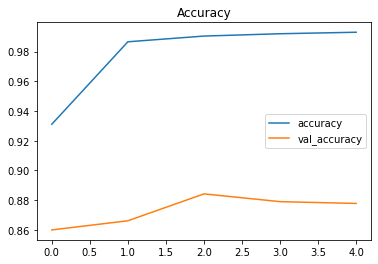

In [14]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

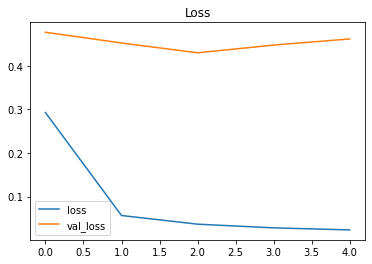

In [15]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()